In [1]:

### Benjamin Tollison ###

from decimal import Decimal

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import sympy as sp
from IPython.display import Latex, Math, display
from sympy import (
    Eq,
    Function,
    Matrix,
    cos,
    cosh,
    exp,
    integrate,
    lambdify,
    pi,
    sin,
    sinh,
    symbols,
)
from sympy.solvers.pde import pdsolve
from sympy.solvers.solveset import linsolve


def displayEquations(LHS,RHS):
    left = sp.latex(LHS)
    right = sp.latex(RHS)
    display(Math(left + '=' + right))
    np.set_printoptions(suppress=True)
def displayVariable(variable:str,RHS):
    left = sp.latex(symbols(variable))
    right = sp.latex(RHS)
    display(Math(left + '=' + right))
def displayVariableWithUnits(variable:str,RHS,units):
    left = sp.latex(symbols(variable))
    right = sp.latex(RHS)
    latexUnit = sp.latex(symbols(units))
    display(Math(left + '=' + right + '\\;' +'\\left['+ latexUnit + '\\right]'))
def format_scientific(n):
    a = '%E' % n
    return a.split('E')[0].rstrip('0').rstrip('.') + 'E' + a.split('E')[1]
deg2rad = np.pi/180
rad2deg = 180/np.pi

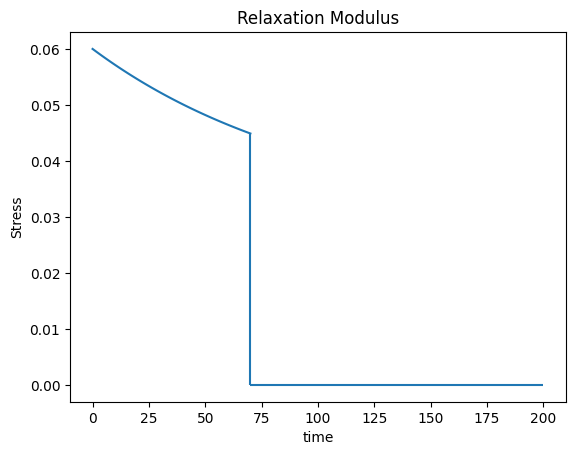

In [16]:
# Problem 1
E = lambda t: 1.5*(1+np.exp(-t/100))
time_range_1 = np.linspace(0,70,100)
strain = 0.02
plt.plot(time_range_1,E(time_range_1)*strain)
plt.hlines(0,70,200)
plt.vlines(70,0,E(time_range_1[-1])*strain)
plt.title('Relaxation Modulus')
plt.xlabel('time')
plt.ylabel('Stress')
plt.show()

In [55]:
# Problem 2
tolerence = 1e-8
rho_s_guess = 1
rho_a = 0.98
rho_c = 1.05
crystallingity_function = lambda rho_s : .4*rho_s*(rho_c-rho_a)-rho_s*rho_c + rho_c*rho_a
crystallingity_prime = lambda rho_s : (rho_s*rho_c*(rho_c-rho_a) - rho_c*(rho_s-rho_a)*(rho_c-rho_a))/(rho_s*(rho_c-rho_a))**2
rho_s_values = []
while crystallingity_function(rho_s_guess) > tolerence or crystallingity_function(rho_s_guess) < -tolerence:
  rho_s_values.append(rho_s_guess)
  rho_s_guess = rho_s_guess + crystallingity_function(rho_s_guess)/crystallingity_prime(rho_s_guess)
display(pd.DataFrame.from_dict((rho_s_values)))
displayVariableWithUnits('\\rho_s',round(rho_s_values[-1],4),'\\frac{g}{cm^3}')

,0
0,1.000000
1,1.000476
2,1.000920
3,1.001333
4,1.001717
...,...
180,1.006849
181,1.006849
182,1.006849
183,1.006849


<IPython.core.display.Math object>